# Random matrices: homework 1 due September 11, 2019
# Setember 4, 2019 Try to do Exercise 1, Problem 1 only for now.  More hints coming for the other parts. (see piazza for those wanting to do all math theory)

(a video of how to do this homework will be setup this weekend)

Submit this notebook via Gradescope; instructions to follow.

#### Exercise 1 (Set-up)

(1.)  Follow the detailed instructions [here](https://github.com/mitmath/julia-mit) to:

  - Download the current stable version (1.2) of Julia for your machine from [here](https://julialang.org/downloads) and install it. 

  - Run the Julia executable.    
    
  - Install the IJulia package that provides an interface to the Jupyter notebook.
    
  - Run IJulia by typing `using IJulia; notebook()` at the Julia prompt.
    
(2a.) (If you know about github or want to learn go to 2b).  You can download the hw easily
from [here](https://nbviewer.jupyter.org/github/mitmath/18338/blob/master/HW/Random%20matrices%20HW1.ipynb) by
right clicking on the icon on the upper right and do "save link as" or equivalent.

(2b.) Alternatively -- -Clone a copy of this repository to your machine using `git clone https://github.com/mitmath/18338.git` from a terminal, or alternatively using a visual git client like GitKraken. 

 


(3.) Open the homework 1 notebook. Make a copy of the notebook using `File->Make a copy` from the `File` menu. Change the name of the copy to add your name as in HW1.alan_edelman.ipynb

(4) Figure out how to enter 1+1 in a cell in Jupyter and get 2 with SHIFT + ENTER.  Stay tuned: a video may come soon.



#### Exercise 2 (Distributions)

(1). Follow the instructions [here](https://juliastats.github.io/Distributions.jl/stable/starting/) to create a standard normal distribution object and draw 1000 samples from it using the `Distributions.jl` package.




In [ ]:
]add Distributions
# Do this once to load the package

In [80]:
using Random, Distributions
d = Normal()
x = rand(d,5) # change 5 to 1000

5-element Array{Float64,1}:
 -1.6171084308048427
 -0.5179877213961307
 -1.2933665663082083
 -0.5938518629926575
 -1.2991929686155204

(2). Use the `histogram` command from the `Plots.jl` package to draw a histogram of the result, using the `normalize=true` keyword argument to normalize the result to area 1.
You can fix the number of histogram bins with the `bins=` keyword argument.

<br>
Warning: plots takes forever the first time it compiles 


In [ ]:
]add Plots  # comment after first time

In [78]:
using Plots

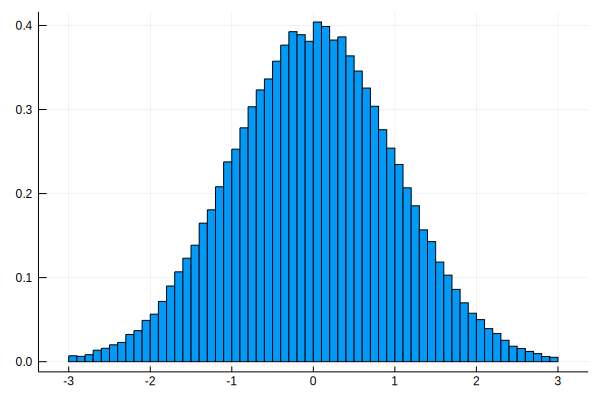

In [164]:
# draw a histogram plot, which requires the keyword argument "bins"
r = rand(d,10^5)
Plots.histogram(r, normalize = true, bins = -3:.1:3, legend = false)

In [ ]:
]add StatsBase

In [88]:
using StatsBase

In [192]:
h = fit(Histogram, r,  -3:.1:3)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -3.0:0.1:3.0
weights: [70, 63, 83, 136, 159, 200, 229, 323, 368, 490  …  499, 392, 334, 254, 183, 156, 122, 96, 62, 52]
closed: left
isdensity: false

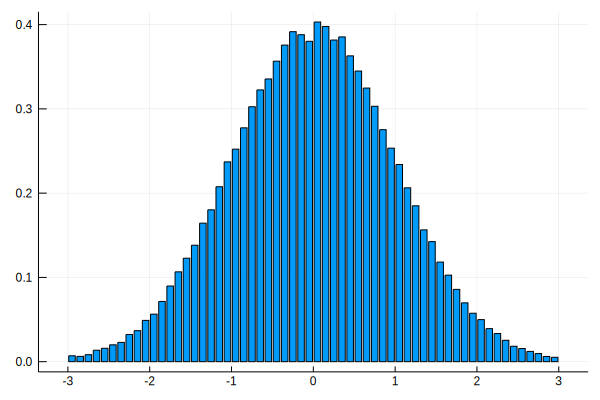

In [219]:
Plots.bar(h.edges,h.weights/Float64(h.edges[1].step)/length(r), legend=false)

In [158]:
# obtain the information in the histogram 
h = StatsBase.normalize( fit(Histogram, r,  -3:.1:3) , mode = :pdf)

Histogram{Float64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -3.0:0.1:3.0
weights: [0.004411514051674871, 0.006115962662549252, 0.008020934639408856, 0.013535327204002445, 0.013535327204002445, 0.022258093624359574, 0.02737143945698272, 0.03408897221748764, 0.03739760775624379, 0.04702272932353442  …  0.0496295330813423, 0.037096822707265956, 0.03298609370456892, 0.026168299261071393, 0.01864867303662559, 0.015440299180862047, 0.01012642998225368, 0.010527476714224123, 0.005313869198608367, 0.005815177613571421]
closed: left
isdensity: true

In [165]:
? StatsBase.normalize;

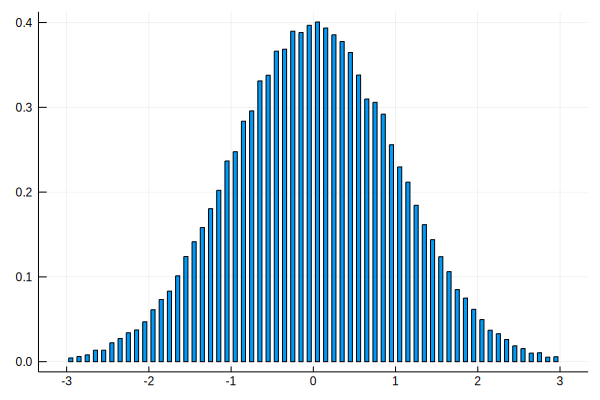

In [166]:
Plots.bar(h.edges,h.weights, legend=false, bar_width = .05) # or even a bar chart which has spaces betwen the bars

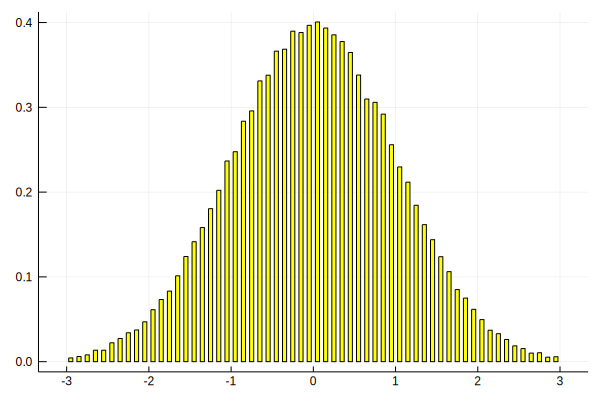

In [167]:
Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false) 

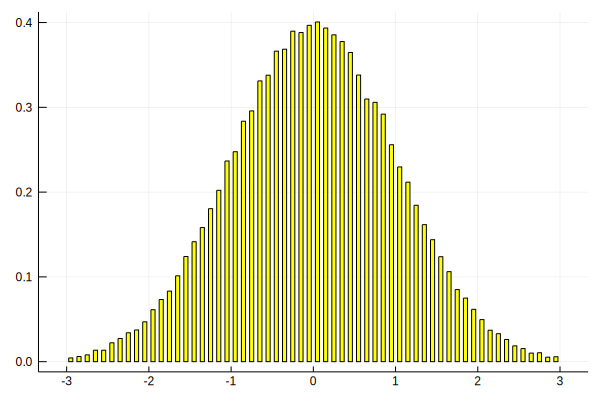

In [187]:
Plots.bar(h.edges,h.weights, fillcolor = RGB(1,1,0), bar_width = .05, legend=false) 

(3.) Use the `plot!` command to draw the exact PDF of the distribution on top.


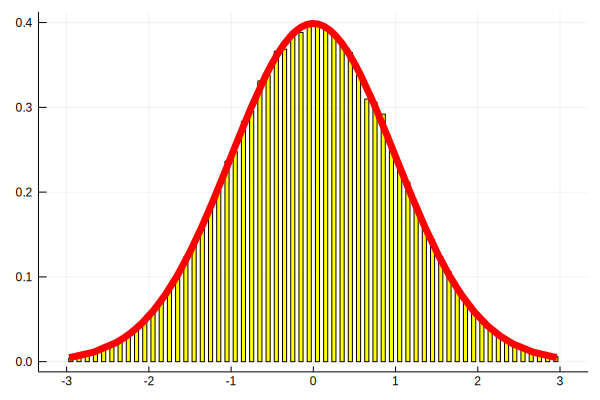

In [188]:
plot!( x-> exp(-x^2/2)/√(2π),-3,3, color=:red, lw=7)

(4.) Use the function `pdf` from the `Distributions.jl` package to do the same, without needing to explicitly type the formula for the PDF.

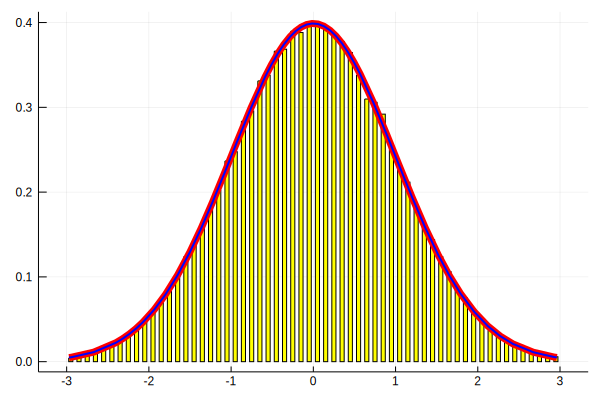

In [189]:
plot!( x->pdf(d,x), -3,3, color=:blue, lw=2)

(5.) Use the `@manipulate` command from the `Interact.jl` package to interactively change the number of samples used for the histogram.  (unfortunately @manipulate may be flaky, don't sweat it)

In [190]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8491286209219488748\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1886873309644604213\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8491286209219488748\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

(6.) Repeat the above steps for the chi distribution with "2.8 degrees of freedom". How could you generalize this for any distribution?

#### Exercise 3 (Eigenvalues of symmetric random matrices; the semicircle law)

(1.) Generate a random gaussian matrix of size $n \times n$.  Maybe start with n = 5 and grow n?

In [ ]:
using LinearAlgebra

In [ ]:
n = 1000
A = rand(Normal(),n,n)


(2.) Symmetrize the matrix using the transpose operator `'`  (apostrophe) and `+` , and then create a version of type `Symmetric`.

In [ ]:
A = Symmetric((A+A')/2)

(3.) Use `eigvals` from the `LinearAlgebra` standard library to calculate the eigenvalues of the matrix.  (NB: Standard libraries do *not* need to be installed; they come together with the Julia installation.)

In [ ]:
eigvals(A)

(4.) Plot the eigenvalues. Repeat the above several times, plotting all curves on top of one another.

In [ ]:
using Plots

In [ ]:
scatter(eigvals(A)./sqrt(2000),ms=0.5,legend=false)

In [ ]:
plot!( x->asin((x-n/2)/n*(π/2)),1,n)

(5.) Use e.g. `append!` to combine the results from many runs into a single data vecxtor. Histogram the data you have collected, and compare it to the exact result (semicircle law).


(6.) Make an interactive visualization in which you can vary the number of trials and size of matrices. Comment on the results.

#### Exercise 4 (Singular values)

1. Follow a similar approach as in exercise 3 to visualize the Marčenko-Pastur law on singular values of a rectangular matrix, using the `svdvals` function.

#### Exercise 5 (Generalized singular values)


1. Follow a similar approach as in exercise 3 to visualize the Wachter law on the generalized singular values of a matrix, using the `svdvals(A, B)` method.

#### (Optional)  Exercise 6 (Parallel computing) 

In this exercise we will parallelize a random matrix calculation in a simple way.


(1.) Install the `DistributedArrays.jl` package. 


(2.) Load the `Distributed.jl` stdlib package. Use the `addprocs` function to add 2 processes (assuming that you have a multicore machine).


(3.) Create a `DArray` ("distributed array") `d`, e.g. using the array comprehension syntax `d = @DArray [i for i in 1:2]`.


(4.) Define a function `f` that will run the simulation from exercise 3 and returns a data vector of data.  *Broadcast* this function over the `d` using the syntax `f.(d)`.
This should return a new `DArray`.


(5.) Broadcast `fit(Histogram, v)` from the `StatsBase` package over this result. This should give another `DArray`; call it `hists`.


(6.) Use the `reduce(merge, hists)` function to combine the two histograms into one.


(7.) Compare the total time taken for this parallel version to a serial version.